In [1]:
import os, json
import pandas as pd
import numpy as np

path_to_json = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/2'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) 

['44.json']


In [2]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/2/'
for file in json_files:
    print(filepath + file)

/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/2/44.json


In [3]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/2/'

match_list=[]

for file in json_files:
    df_matches=pd.read_json(filepath + file)
    match_list.extend(df_matches['match_id'].values)

In [4]:
print(match_list)

[3749052, 3749522, 3749246, 3749257, 3749642, 3749358, 3749346, 3749253, 3749079, 3749465, 3749133, 3749528, 3749233, 3749462, 3749552, 3749296, 3749454, 3749276, 3749068, 3749310, 3749493, 3749434, 3749192, 3749196, 3749448, 3749360, 3749453, 3749278, 3749603, 3749153, 3749403, 3749526, 3749431]


In [5]:
def dict_to_dataframe(a):
    dataframe = df_match[a].apply(pd.Series)
    dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
    return dataframe 

filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/2/'

appended_data = []

for file in json_files:
    df_match = pd.read_json(filepath + file)
    
    df_home_team = dict_to_dataframe("home_team")
    df_away_team = dict_to_dataframe("away_team")

    frames = [df_match, df_home_team, df_away_team]

    df = pd.concat(frames, axis = 1)

    df = df[['match_id', 'home_team_home_team_name', 'away_team_away_team_name']]
    appended_data.append(df)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)

In [6]:
appended_data

,match_id,home_team_home_team_name,away_team_away_team_name
0,3749052,Wolverhampton Wanderers,Arsenal
1,3749522,Arsenal,Wolverhampton Wanderers
2,3749246,Arsenal,Manchester United
3,3749257,Arsenal,Leicester City
4,3749642,Arsenal,Charlton Athletic
5,3749358,Middlesbrough,Arsenal
6,3749346,Leeds United,Arsenal
7,3749253,Liverpool,Arsenal
8,3749079,Arsenal,Chelsea
9,3749465,Blackburn Rovers,Arsenal


In [7]:
#temporary_match_list = [69225, 69212] #(27, 23/ (25, 23)/ (18, 23))


shot_appended_data = []
for match in match_list:

    filepath = "/Users/aritramajumdar/Downloads/statsbomb/open-data/data/events/"
    match_id = str(match)

    df = pd.read_json(filepath+match_id+".json")


    cols = ['tactics', 'related_events']
    df = df.drop(cols, axis = 1)


    def dict_to_dataframe(a):
        dataframe = df[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 


    df_type = dict_to_dataframe("type")
    df_possession_team = dict_to_dataframe("possession_team")
    df_play_pattern = dict_to_dataframe("play_pattern")
    df_team = dict_to_dataframe("team")
    df_player = dict_to_dataframe("player")
    df_position = dict_to_dataframe("position")
    df_pass = dict_to_dataframe("pass")
    df_shot = dict_to_dataframe("shot")


    
    a = ['type', 'possession_team', 'play_pattern', 'team',
       'player', 'position', 'pass', 'shot']

    df = df.drop(a, axis = 1)

    frames = [df_type, df_play_pattern, df_team,
             df_player, df_position, df_pass, df_shot, df_possession_team]

    df_total = pd.concat(frames, axis = 1)

    frames1 = [df, df_total]

    df_final = pd.concat(frames1, axis = 1)

    shot_col = [col for col in df_total if col.startswith('shot')]
    
    df_extra = df_final[['id', 'index', 'period', 'timestamp', 'minute', 
                     'second', 'possession', 'duration', 'location', 
                     'under_pressure', 'type_name', 'play_pattern_name',
                     'pass_height', 'pass_type', 'possession_team_name', 'player_id', 'player_name']]

    df_shot = df_final[shot_col]


    frames2 = [df_extra, df_shot]
    shots = pd.concat(frames2, axis = 1)

    b = ['shot_0','shot_key_pass_id']
    shots = shots.drop(b, axis = 1)


    def dict_to_dataframe(a):
        dataframe = shots[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 

    df_shot_type = dict_to_dataframe("shot_type")
    df_shot_technique = dict_to_dataframe("shot_technique")
    df_shot_outcome = dict_to_dataframe("shot_outcome")
    df_shot_body_part = dict_to_dataframe("shot_body_part")
    df_pass_height = dict_to_dataframe("pass_height")
    df_pass_type = dict_to_dataframe("pass_type")


    frames3 = [df_shot_type, df_shot_technique, df_shot_outcome, df_shot_body_part, df_pass_height, df_pass_type]

    df_shot_data = pd.concat(frames3, axis = 1)

    c = ["shot_type", "shot_technique", "shot_outcome", "shot_body_part", "pass_height", "pass_type"]

    shots = shots.drop(c, axis = 1)

    frames4 = [shots, df_shot_data]

    shots_data = pd.concat(frames4, axis=1)

    shots_data = shots_data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 
                             'possession_team_name', 'player_id', 'player_name',
                           'duration', 'location', 'under_pressure', 'type_name',
                            'play_pattern_name', 'pass_height_name',
                           'shot_end_location', 'shot_freeze_frame',
                           'shot_type_name', 'shot_technique_name', 
                           'shot_outcome_name', 'shot_body_part_name','shot_statsbomb_xg']]


    shots_data['previous_type_name'] = shots_data['type_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['pass_height_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['previous_pass_height_name'].ffill(axis = 0)

    shots_data = shots_data[shots_data['type_name'] == 'Shot']

    shots_data["location_x"] = shots_data["location"].str[0]
    shots_data["location_y"] = shots_data["location"].str[1]

    shots_data["shot_end_location_x"] = shots_data["shot_end_location"].str[0]
    shots_data["shot_end_location_y"] = shots_data["shot_end_location"].str[1]


    d = ['type_name', 'pass_height_name', 'location', 'shot_end_location']
    shots_data = shots_data.drop(d, axis = 1)  
    
    shots_data['match_id'] = int(match)
    shot_appended_data.append(shots_data)
    

shot_appended_data = pd.concat(shot_appended_data)

In [8]:
shots_data_final = pd.merge(shot_appended_data, appended_data, on='match_id')
shots_data_final['home_away'] = np.where((shots_data_final['possession_team_name'] == shots_data_final['home_team_home_team_name']), 
                                         'Home', 'Away')


#e = ['home_team_home_team_name', 'away_team_away_team_name']
#shots_data_final = shots_data_final.drop(e, axis = 1)

In [9]:
shots_data_final

,id,index,period,timestamp,minute,second,possession,possession_team_name,player_id,player_name,...,previous_type_name,previous_pass_height_name,location_x,location_y,shot_end_location_x,shot_end_location_y,match_id,home_team_home_team_name,away_team_away_team_name,home_away
0,b69245a8-00da-4bac-8766-7b1d7548acbc,360,1,2022-11-24 00:08:11.523,8,11,22,Arsenal,15042.0,Dennis Bergkamp,...,Ball Receipt*,Low Pass,104.4,34.8,120.0,43.8,3749052,Wolverhampton Wanderers,Arsenal,Away
1,86c1c1ba-71a9-401e-a11e-c43716c2f543,475,1,2022-11-24 00:12:19.239,12,19,28,Arsenal,15516.0,Thierry Henry,...,Pressure,Ground Pass,107.2,18.1,118.7,38.9,3749052,Wolverhampton Wanderers,Arsenal,Away
2,83491870-daa3-4174-b59a-f96d63c9881d,480,1,2022-11-24 00:12:23.131,12,23,28,Arsenal,40221.0,Gilberto Aparecido da Silva,...,Ball Receipt*,Low Pass,109.1,50.3,120.0,29.5,3749052,Wolverhampton Wanderers,Arsenal,Away
3,03f7b8ae-8f2d-448f-a75e-fb3aa350cb91,508,1,2022-11-24 00:13:45.318,13,45,32,Wolverhampton Wanderers,40312.0,Paul Butler,...,Duel,High Pass,113.9,47.8,120.0,46.6,3749052,Wolverhampton Wanderers,Arsenal,Home
4,9d164056-1ab0-4e31-adfc-2c806537c0bd,718,1,2022-11-24 00:20:20.793,20,20,48,Wolverhampton Wanderers,24765.0,Denis Irwin,...,Foul Won,High Pass,94.2,32.9,120.0,34.7,3749052,Wolverhampton Wanderers,Arsenal,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,af29f86f-3a68-45a3-a491-4becf1840c5c,2716,2,2022-11-24 00:30:05.956,75,5,169,Newcastle United,40227.0,Laurent Robert,...,Carry,Ground Pass,78.2,38.9,103.8,40.0,3749431,Newcastle United,Arsenal,Home
794,461c0ca9-d45e-4cd3-9ee2-35a762790cef,2740,2,2022-11-24 00:30:39.679,75,39,170,Arsenal,23816.0,José Antonio Reyes Calderón,...,Ball Receipt*,High Pass,113.8,33.3,118.3,38.0,3749431,Newcastle United,Arsenal,Away
795,ba4b09d4-e8aa-4223-a337-5f2aa44ed16b,2815,2,2022-11-24 00:32:22.286,77,22,176,Arsenal,15516.0,Thierry Henry,...,Carry,Ground Pass,96.6,24.7,120.0,45.4,3749431,Newcastle United,Arsenal,Away
796,a552f030-e8b9-49c8-ae1b-8030f47869f2,2964,2,2022-11-24 00:36:56.673,81,56,185,Newcastle United,40226.0,Craig Bellamy,...,Ball Receipt*,High Pass,109.7,25.1,120.0,36.1,3749431,Newcastle United,Arsenal,Home


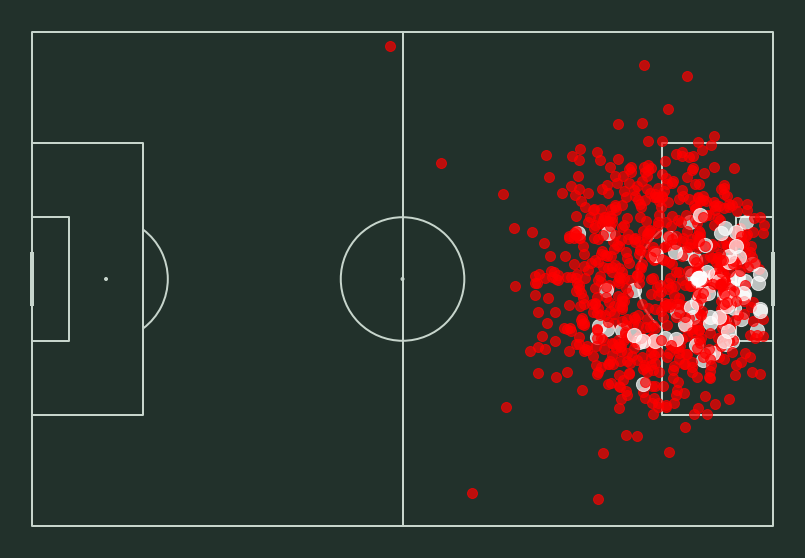

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

"""
#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half = True)
"""
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)


pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(shots_data_final['location_x'])):
    if shots_data_final['shot_outcome_name'].iloc[x] == 'Goal':
        #plt.plot((passes['x'].iloc[x],passes['end_x'].iloc[x]),(passes['y'].iloc[x],passes['end_y'].iloc[x]),color='green')
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'w', s=200, alpha = 0.7)
    else:
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'r', s=100, alpha = 0.7)
        
    

In [11]:
shots_data_final.to_excel("EPL.xlsx")